In [28]:
import pandas as pd
import numpy as np
import os


In [151]:
rna_seq_df

,Malaka_HO_1,Malaka_HO_2,Malaka_HO_3,MSU_HO_1,MSU_HO_2,MSU_HO_3,Malaka_AX_1.,Malaka_AX_2,Malaka_AX_3,MSU_AX_1,MSU_AX_2,MSU_AX_3
GeneID,,,,,,,,,,,,
AT1G01010,4,9,4,13,15,12,5,4,5,8,3,9
AT1G01020,25,14,25,53,37,23,25,26,18,26,25,17
AT1G01030,67,59,54,115,151,92,76,83,57,123,79,98
AT1G01040,600,572,533,654,1075,525,478,705,413,752,620,606
AT1G01046,1,0,3,4,2,0,4,5,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01370,1145,560,743,866,1237,748,749,906,499,1050,839,751
ATMG01380,181,140,106,182,334,174,137,163,94,180,128,141
ATMG01390,8839,4918,6584,8564,10727,6346,6429,7567,4879,9003,7091,6989


In [29]:
rna_seq_df = pd.read_csv(os.path.join("data", "rna-seq", "rna_arabidopsis.gz"), index_col=0)
rna_seq_df

from scipy.stats import f_oneway

gene_anova_df = pd.DataFrame(columns=["gene", "pval", "gene_HO_mean", "gene_AX_mean"])

for i_row, row in rna_seq_df.iterrows():

    gene_HO = row[["Malaka_HO_1", "Malaka_HO_2", "Malaka_HO_3", "MSU_HO_1", "MSU_HO_2", "MSU_HO_3"]]
    gene_AX = row[["Malaka_AX_1.", "Malaka_AX_2", "Malaka_AX_3", "MSU_AX_1", "MSU_AX_2", "MSU_AX_3"]]
    anov              = f_oneway(gene_HO, gene_AX)
    pval_gene         = anov.pvalue

    gene_HO_mean = gene_HO.mean()
    gene_AX_mean = gene_AX.mean()

    df = pd.DataFrame([{"gene" :        i_row,
                        "pval":         pval_gene,
                        "gene_HO_mean": gene_HO_mean,
                        "gene_AX_mean": gene_AX_mean}])
    gene_anova_df = pd.concat([df, gene_anova_df], ignore_index=True)

gene_anova_df["log2_expression"] = np.log2(gene_anova_df["gene_HO_mean"]/gene_anova_df["gene_AX_mean"])


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30476/3719977126.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_anova_df = pd.concat([df, gene_anova_df], ignore_index=True)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/scipy/

(-9.450922075934141, 9.450922075934141)

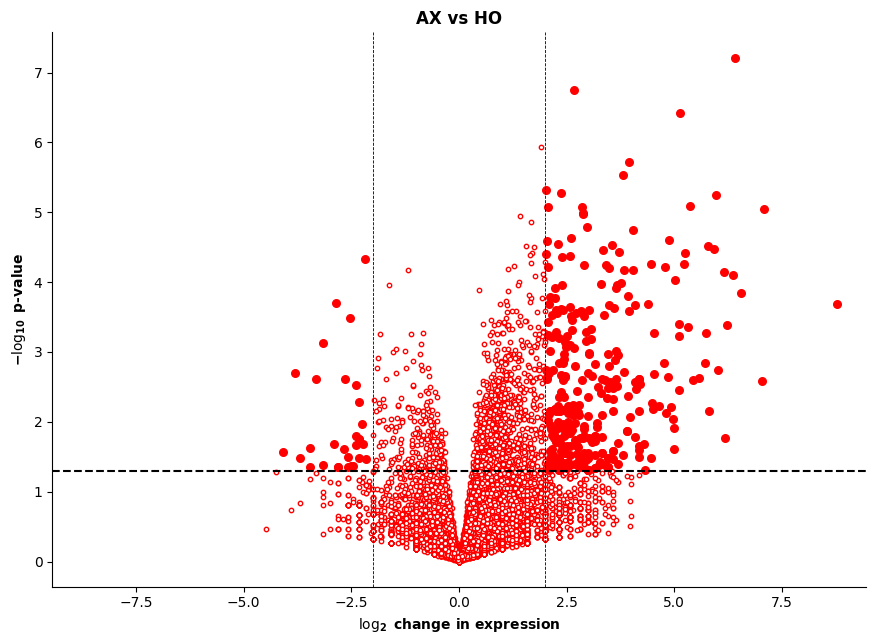

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10.5, 7.2))

ax.scatter(gene_anova_df["log2_expression"], -np.log10(gene_anova_df["pval"]), fc="w", ec="r", s=10)
ax.axhline(-np.log10(0.05), color="k", ls="--")
ax.axvline(x=-2, color="k", ls="--", lw=0.6)
ax.axvline(x=2,  color="k", ls="--", lw=0.6)

gene_sig_exp_anova_df = gene_anova_df.query("pval<0.05 and (log2_expression>2 or log2_expression<-2)")

for _, row in gene_sig_exp_anova_df.iterrows():
    gene = row["gene"]
    row  = gene_anova_df[gene_anova_df["gene"]==gene]
    ax.scatter(row.log2_expression,   -np.log10(row.pval), fc="r", ec="r", s=30)

ax.set_xlabel(r"$\mathbf{{\log_2}}$ change in expression", weight="bold")
ax.set_ylabel(r"$\mathbf{{-\log_{10}}}$ p-value", weight="bold")

ax.set_title("AX vs HO", weight="bold")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(-np.max(np.abs(ax.get_xlim())), np.max(np.abs(ax.get_xlim())))

In [67]:
x_ho    = rna_seq_df[["Malaka_HO_1", "Malaka_HO_2", "Malaka_HO_3", "MSU_HO_1", "MSU_HO_2", "MSU_HO_3"]]
x_train = x_ho.values
y_train = np.ones(x_train.shape[0])


x_ax    = rna_seq_df[["Malaka_AX_1.", "Malaka_AX_2", "Malaka_AX_3", "MSU_AX_1", "MSU_AX_2", "MSU_AX_3"]]
x_train = np.c_[x_train.T, x_ax.values.T].T
y_train = np.c_[[y_train.T], [np.zeros(x_ax.shape[0])]].T
x_train = (x_train - np.expand_dims(x_train.mean(axis=1), -1)) / np.expand_dims(x_train.std(axis=1), -1)


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30476/2667219275.py:9: RuntimeWarning: invalid value encountered in divide
  x_train = (x_train - np.expand_dims(x_train.mean(axis=1), -1)) / np.expand_dims(x_train.std(axis=1), -1)


In [69]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

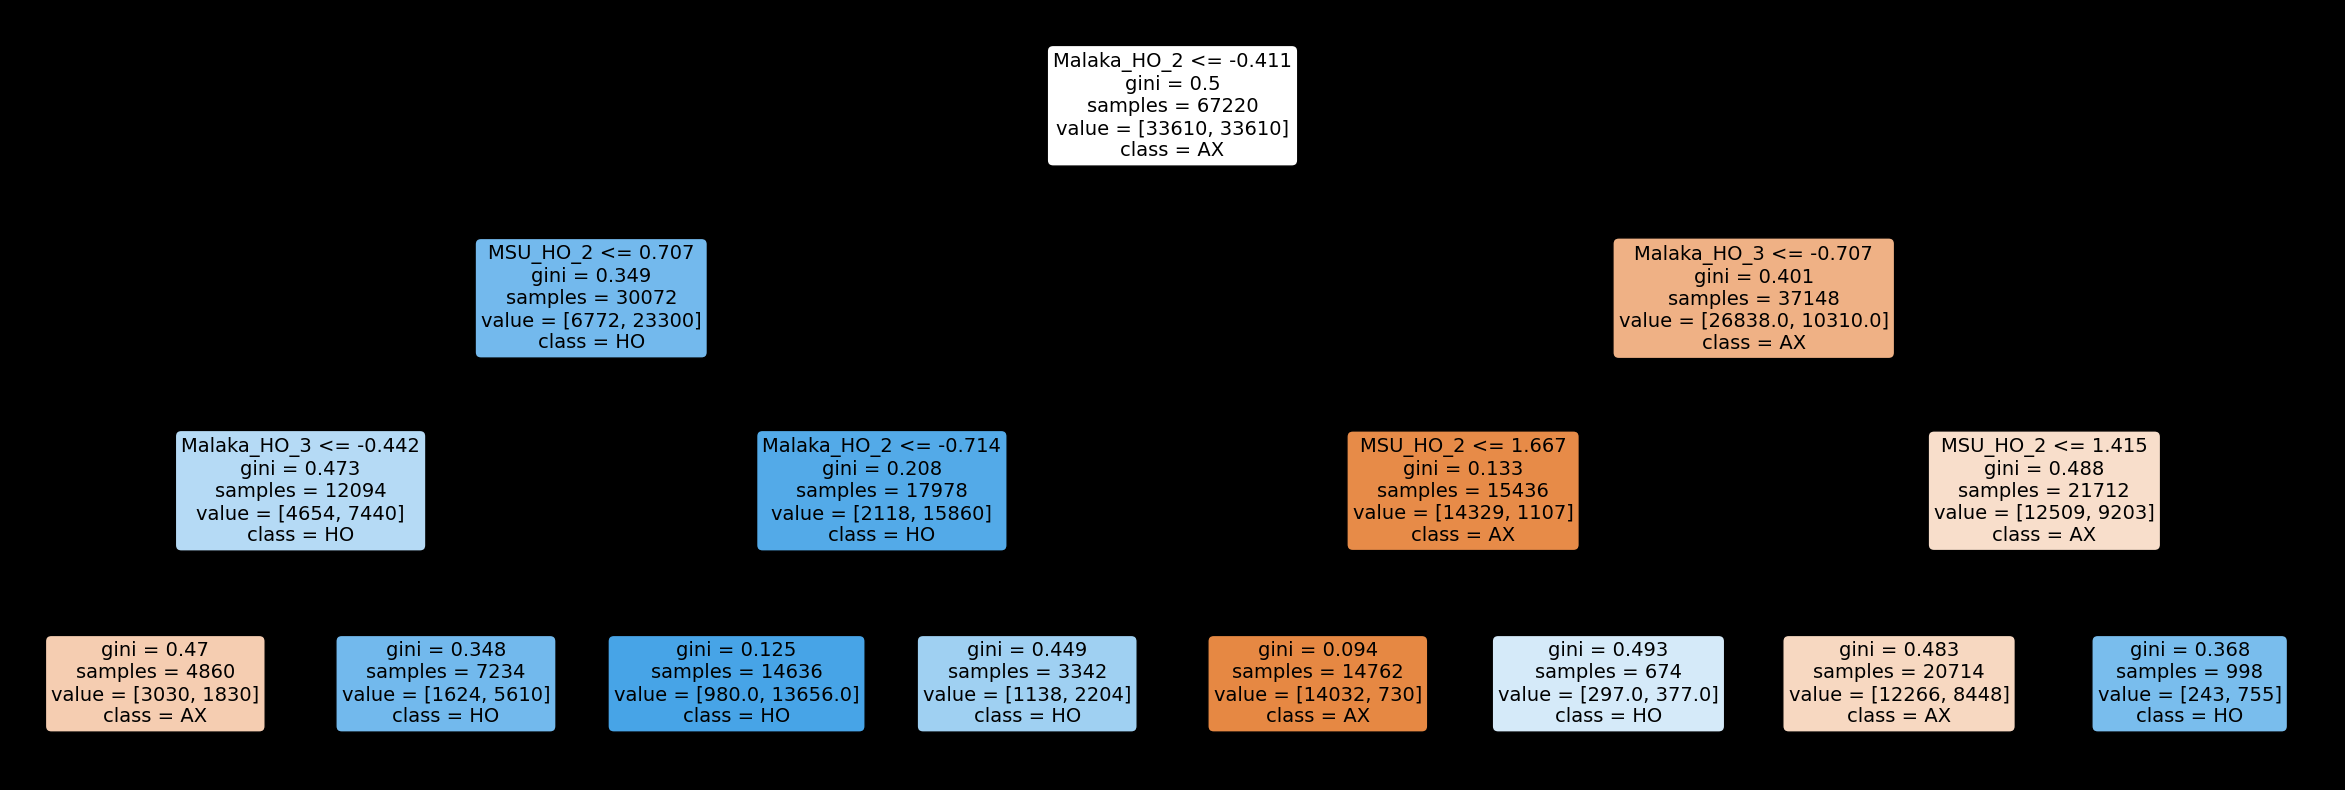

In [75]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,
                   feature_names = list(rna_seq_df.keys()),
                   class_names   = ["AX", "HO"],
                   rounded       = True,
                   filled        = True,
                   fontsize      = 14)

In [150]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm


In [114]:
hd_df = pd.read_csv(os.path.join("recitations", "data", "hearth_disease.csv"))
hd_df["famhist"] = hd_df["famhist"].map({"Present": 1, "Absent": 0})

In [130]:

X_all    = hd_df[["sbp", "tobacco",	"ldl",	"adiposity", "famhist",	"typea", "obesity",	"alcohol", "age"]]
y        = hd_df["chd"]
μ_xtrain = np.expand_dims(X_all.mean(axis=1), -1)
σ_xtrain = np.expand_dims(X_all.std(axis=1), -1)

X_all = (X_all - μ_xtrain) / σ_xtrain

In [157]:
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)

X_train, X_test , y_train , y_test = skm.train_test_split(X_all, y, test_size=0.3, random_state=0)

reg = DTC(max_depth=3)

reg.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'age <= 0.069\ngini = 0.453\nsamples = 323\nvalue = [211, 112]'),
 Text(0.25, 0.625, 'obesity <= -0.346\ngini = 0.207\nsamples = 111\nvalue = [98, 13]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'obesity <= -0.43\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.375, 'alcohol <= -0.753\ngini = 0.169\nsamples = 107\nvalue = [97, 10]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4375, 0.125, 'gini = 0.141\nsamples = 105\nvalue = [97, 8]'),
 Text(0.75, 0.625, 'sbp <= 2.2\ngini = 0.498\nsamples = 212\nvalue = [113.0, 99.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'tobacco <= -0.763\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.5625, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.875, 0.375, 'to

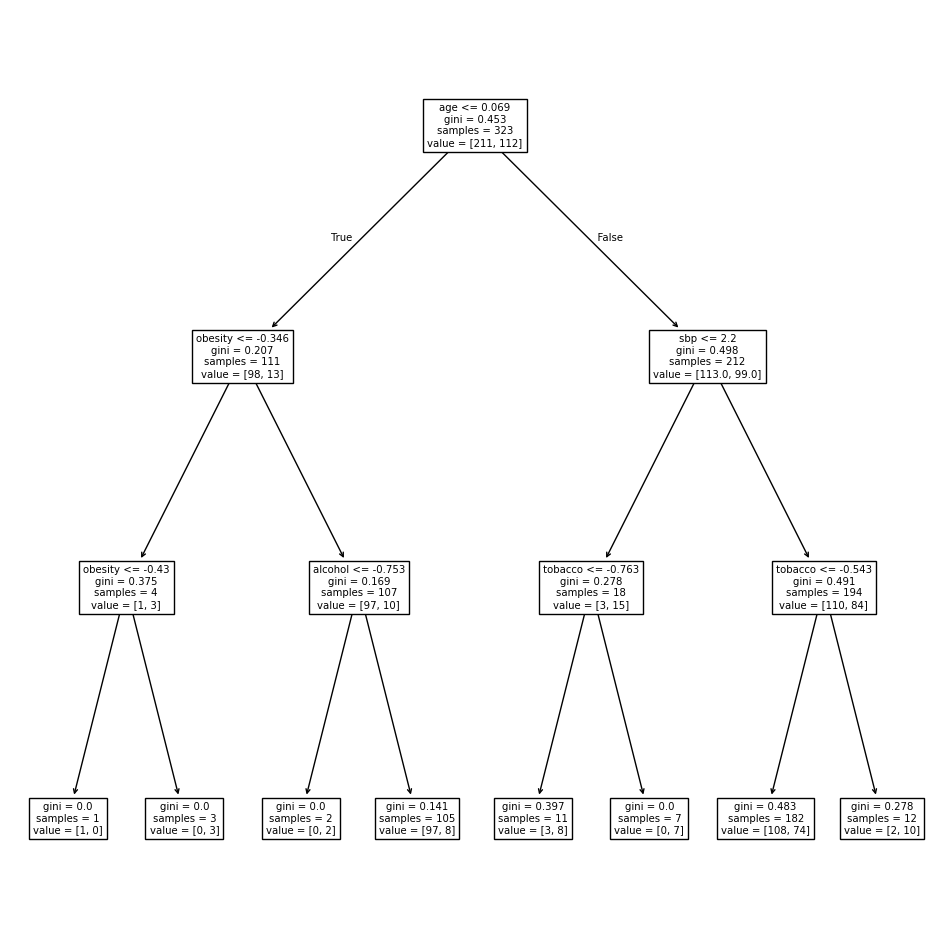

In [155]:
ax = subplots(figsize = (12, 12))[1]
plot_tree(reg, feature_names=list(X_all.keys()), ax=ax)

In [162]:
accuracy_score(y, reg.predict(X_all)), accuracy_score(y_train, reg.predict(X_train)), accuracy_score(y_test, reg.predict(X_test))

(0.7056277056277056, 0.7306501547987616, 0.6474820143884892)

In [164]:
from sklearn.metrics import entropy

entropy( y_train )

ImportError: cannot import name 'entropy' from 'sklearn.metrics' (/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [2]:
def sample_from_normal_distribution(μ, σ):
    return np.random.normal(μ, σ)

x1 = sample_from_normal_distribution(0, 1)
x1

0.6287898008297301

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_32882/3951529395.py:23: RuntimeWarning: invalid value encountered in scalar divide
  ax[1].scatter(ni, np.var(s)/(ni-1), color="k")


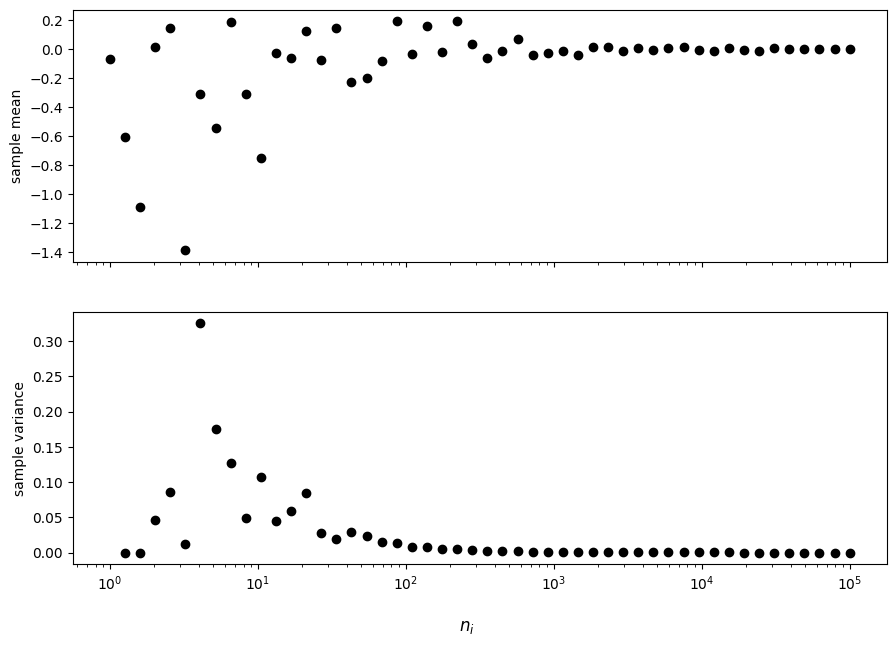

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x2 = sample_from_normal_distribution(0, 1)
x2


s1 = np.random.normal(0, 1, 10)
s2 = np.random.normal(0, 1, 100)
s3 = np.random.normal(0, 1, 1000)

n1 = 10
n2 = 100
n3 = 1000

np.var(s1), np.var(s2), np.var(s3)

fig, ax = plt.subplots(2, 1, figsize=(10.5, 7.2), sharex=True)

for ni in np.logspace(0, 5):
    s = np.random.normal(0, 1, int(ni))
    ax[0].scatter(ni, np.mean(s), color="k")
    ax[1].scatter(ni, np.var(s)/(ni-1), color="k")

fig.supxlabel(r"$n_i$")

ax[0].set_ylabel(r"sample mean")
ax[1].set_ylabel(r"sample variance")

ax[0].set_xscale("log")
ax[1].set_xscale("log")